<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/regresion_simple_arizona_houses_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente de datos: **[Arizona Houses 2021](https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021)**, Kaggle

El conjunto de datos contiene casas de Arizona que se han listado anteriormente y algunas de sus características e información.

# Cargar el conjunto de datos y explorarlo

Vamos a empezar cargando y explorando el conjunto de datos.

In [1]:
# Importando pandas
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/AZhousingData.csv')

# Mostrar las primeras filas del conjunto de datos
data.head()

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...


El conjunto de datos contiene información sobre viviendas, incluyendo su precio (**'Price'**), dirección (**'address'**), área local (**'Local_area'**), código postal (**'zipcode'**), número de habitaciones (**'beds'**), número de baños (**'baths'**), superficie en pies cuadrados (**'sqft'**), y un enlace a Zillow (**'url'**).

Para este análisis, nos centraremos en las columnas **'Price'** y **'sqft'** para realizar la regresión lineal simple.

# Entendiendo los datos



## Gráfico de correlaciones

El algoritmo de regresión lineal se basa altamente en correlaciones por lo que iniciaremos viendo un gráfico de correlaciones usando pairplot de Seaborn.

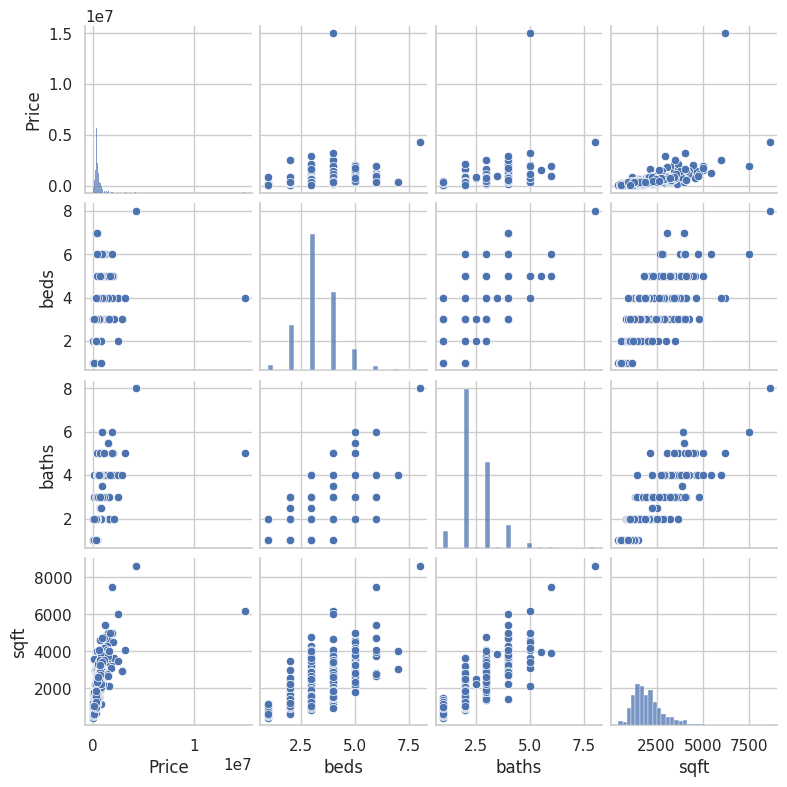

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['Price', 'beds', 'baths', 'sqft']
sns.pairplot(data[cols], height=2)
plt.show()

## Matriz de correlación

In [5]:
# Matriz de correlación de las variables
data[cols].corr()

,Price,beds,baths,sqft
Price,1.000000,0.234908,0.443757,0.569340
beds,0.234908,1.000000,0.594000,0.643928
baths,0.443757,0.594000,1.000000,0.806287
sqft,0.569340,0.643928,0.806287,1.000000


## Mapa de calor

<Axes: >

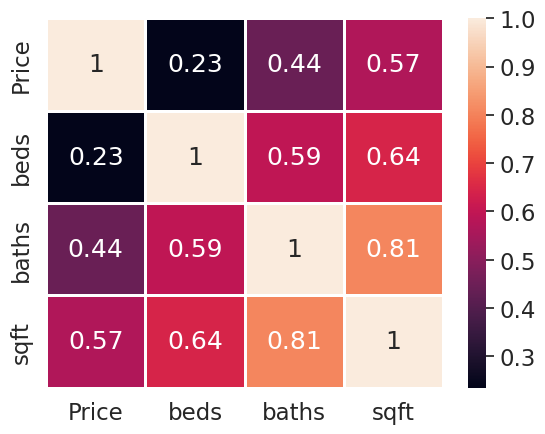

In [6]:
# Mapa de calor
import numpy as np
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, linewidths=2)

# Preparar los datos: dividirlos en conjuntos de entrenamiento y prueba

A continuación, dividiremos los datos en conjuntos de entrenamiento y prueba.

In [7]:
# Importando train_test_split
from sklearn.model_selection import train_test_split

# Definir las variables independiente (X) y dependiente (y)
X = data['sqft'].values.reshape(-1,1)
y = data['Price'].values

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((450, 1), (113, 1))

Hemos dividido el conjunto de datos en dos partes: un conjunto de entrenamiento con 450 ejemplos y un conjunto de prueba con 113 ejemplos.

# Entrenar un modelo de regresión lineal simple

A continuación, entrenaremos un modelo de regresión lineal simple utilizando el conjunto de entrenamiento.

In [8]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(331.57832753350266, -171118.62128677318)

El modelo de regresión lineal que hemos entrenado tiene la siguiente ecuación:
Precio = 331.58 × sqft − 171,118.62  

Donde:

* Precio es el precio de la vivienda.
* sqft es el área de la vivienda en pies cuadrados.


# Evaluar el rendimiento del modelo en el conjunto de prueba

A continuación, vamos a evaluar el rendimiento del modelo en el conjunto de prueba utilizando el error cuadrático medio (MSE) como métrica de evaluación.

In [9]:
from sklearn.metrics import mean_squared_error

# Predecir los precios en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

mse

1575008564840.591

El error cuadrático medio (MSE) en el conjunto de prueba es aproximadamente $1.575 × 10^12$. Este valor nos da una idea de cuán cerca están las predicciones del modelo a los valores reales. Sin embargo, el MSE por sí solo puede no ser muy intuitivo, ya que está en unidades al cuadrado. Una forma de interpretarlo en las unidades originales (en este caso, dólares) es calcular la raíz cuadrada del MSE (RMSE).

Vamos a calcular el RMSE para tener una idea más clara del error típico de nuestras predicciones.

In [10]:
import numpy as np

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

rmse

1254993.452110644

El error cuadrático medio raíz (RMSE) es aproximadamente **$1,254,993.45**. Esto sugiere que, en promedio, nuestras predicciones se desvían del valor real por aproximadamente 1.25 millones de dólares. Dependiendo del rango de precios en el conjunto de datos, este error puede ser considerado alto o bajo.

# Visualizar los resultados con una gráfica

Finalmente, visualizaremos los resultados con una gráfica que muestre los datos reales y la línea de regresión.

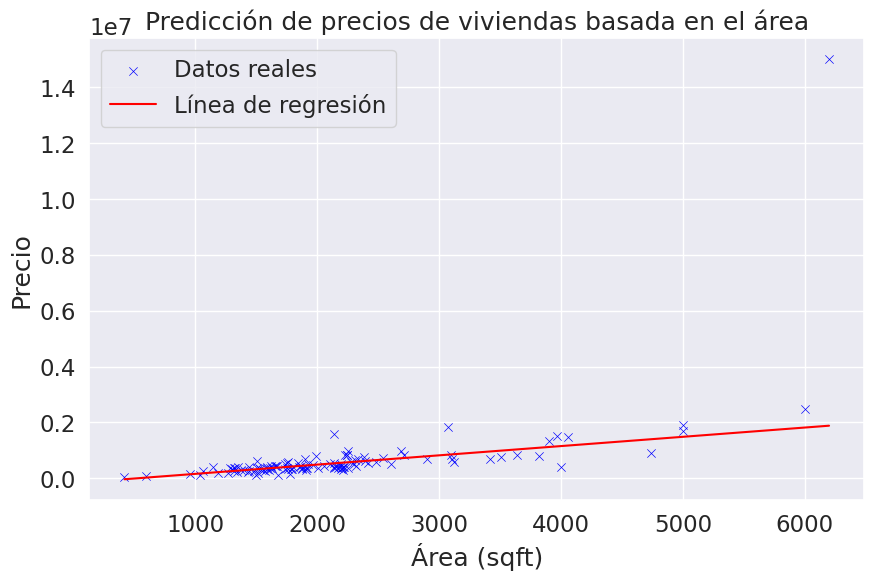

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfica de dispersión con los datos reales
sns.scatterplot(x=X_test.flatten(), y=y_test, marker='x', color='blue', label='Datos reales')

# Gráfica de la línea de regresión
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', label='Línea de regresión')

# Títulos y etiquetas
plt.title('Predicción de precios de viviendas basada en el área')
plt.xlabel('Área (sqft)')
plt.ylabel('Precio')
plt.legend()

plt.show()

Gráfica que muestra la relación entre el área de las viviendas (en pies cuadrados) y sus precios. Las 'x' azules representan los datos reales del conjunto de prueba, mientras que la línea roja representa la línea de regresión generada por nuestro modelo.  

La línea de regresión muestra la tendencia general que sigue el modelo para predecir los precios en función del área. Como puedes observar, hay algunas predicciones que se desvían significativamente de los valores reales, lo que explica el RMSE que calculamos anteriormente.  

Es importante mencionar que la regresión lineal simple es un modelo básico que asume una relación lineal entre las variables. En la práctica, la relación entre el área y el precio de una vivienda puede ser más compleja, y podría ser útil explorar modelos más avanzados o considerar más características para mejorar la precisión de las predicciones.